In [1]:
import cards as ccg
import pandas as pd
import numpy as np

cards = pd.read_csv('cardsTable.csv')
cardsList = [ccg.Minion(i) for i in cards.values.tolist()]

cores = pd.read_csv('cores.csv')
coreList = [ccg.Core(i) for i in cores.values.tolist()]

playersNum = 2
piles = [[ccg.Pile(cardsList, 10) for _ in range(4)] for I in range(playersNum)]
cores = np.random.choice(coreList, 2)
decks = [ccg.Deck(cores[i], piles[i], i) for i in range(playersNum)]

In [2]:
session = ccg.Session(decks)

In [3]:
session.getObservation()

{'battleGround': {'grave': [[], []],
  'table': [[(0, 0, 30, 30, 1, 1)], [(0, 0, 30, 30, 1, 1)]]},
 'piles': [[(10, (1, 2, 0, 1, 1, True)),
   (10, (1, 2, 0, 1, 1, True)),
   (10, (3, 3, 0, 4, 4, True)),
   (10, (2, 2, 0, 3, 3, True))],
  [(10, None), (10, None), (10, None), (10, None)]],
 'winner': -1,
 'turn': 0,
 'end': False}

In [4]:
session.getValidActions()

['skip', ('play', 0), ('play', 1)]

In [5]:
session.action(("play", 1))

{'battleGround': {'grave': [[], []],
  'table': [[(0, 0, 30, 30, 0, 1), (1, 2, 0, 1, 1, True)],
   [(0, 0, 30, 30, 1, 1)]]},
 'piles': [[(10, (1, 2, 0, 1, 1, True)),
   (9, (3, 3, 0, 4, 4, True)),
   (10, (3, 3, 0, 4, 4, True)),
   (10, (2, 2, 0, 3, 3, True))],
  [(10, None), (10, None), (10, None), (10, None)]],
 'winner': -1,
 'turn': 0,
 'end': False}

In [6]:
session.action(("skip"))
session.action(("skip"))

{'battleGround': {'grave': [[], []],
  'table': [[(0, 0, 30, 30, 2, 2), (1, 2, 0, 1, 1, False)],
   [(0, 0, 30, 30, 2, 2)]]},
 'piles': [[(10, (1, 2, 0, 1, 1, False)),
   (9, (3, 3, 0, 4, 4, True)),
   (10, (3, 3, 0, 4, 4, True)),
   (10, (2, 2, 0, 3, 3, True))],
  [(10, None), (10, None), (10, None), (10, None)]],
 'winner': -1,
 'turn': 0,
 'end': False}

In [7]:
session.reset()
state = session.action(("skip"))
i = 0
while not state["end"]:
    i += 1
    state = session.action(("skip"))
i

121

In [8]:
import random

def playFullGame(session):
    endGame = False
    winner = -1
    while not endGame:
        actions = session.getValidActions()
        if len(actions) > 1:
            state = session.action(random.choice(actions[1:]))
        else:
            state = session.action(actions[0])
        endGame = state["end"]
        winner = state["winner"]
    return winner

In [9]:
from IPython.display import clear_output

stat = dict()
stat[-1] = 0
stat[0] = 0
stat[1] = 0
session.reset()
def playRandom():
    for i in range(1000):
        stat[playFullGame(session)] += 1
        session.reset()
        clear_output()
        print(i / 1000)
stat

{-1: 0, 0: 0, 1: 0}

In [10]:
from __future__ import print_function
import numpy as np
import torch
print(torch.__version__)

0.4.1


In [11]:
import copy
import random

def observationTable(table, turn):
    tables = copy.deepcopy(table)
    for i in tables:
        for j in range(len(i), 8):
            i.append(observationMinion(ccg.Minion().getCurState()))
        i[0] = observationCore(i[0])
        for j in range(1, len(i)):
            i[j] = observationMinion(i[j])
        buf = i[1:]
        #random.shuffle(buf)
        i[1:] = buf
    tables[0], tables[turn] = tables[turn], tables[0]
    for i in range(len(tables)):
        tables[i] = np.hstack(tuple(tables[i]))
    return np.hstack(tuple(tables))

def observationCore(core):
    return np.array(list(core))

def observationMinion(minion):
    state = list(minion)
    state[5] = int(state[5])
    return np.array(state)

def observationPile(pile):
    pileCopy = copy.deepcopy(pile)
    #random.shuffle(pileCopy)
    for i in range(len(pileCopy)):
        pileCopy[i] = list(pileCopy[i])
        if pileCopy[i][1] == None:
            pileCopy[i][1] = observationMinion(ccg.Minion().getCurState())
        else:
            pileCopy[i][1] = observationMinion(pileCopy[i][1])
        pileCopy[i] = [pileCopy[i][0]] + pileCopy[i][1].tolist()
    return np.hstack(tuple(pileCopy))

def createStateObservation(state):
    
    observations = dict()
    observations["main"] = observationTable(state["battleGround"]["table"], state["turn"])
    pilesObs = []
    
    for i in state["piles"]:   
        pilesObs.append(observationPile(i))
        
    pilesObs[0], pilesObs[state["turn"]] = pilesObs[state["turn"]], pilesObs[0]
    pilesObs = np.hstack(tuple(pilesObs))
    observations["main"] = observations["main"].tolist() + pilesObs.tolist()

    return observations["main"]
    
    observations["unitsOtCore"]
    observations["unitsActtack"] = []
    for i in range(len(state["table"])):
        for j in range(len()):
            pass
    
    observations["playCard"] = observations["main"]
    
    return observations


In [12]:
createStateObservation(session.getObservation())

[0,
 0,
 30,
 30,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 30,
 30,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 1,
 2,
 0,
 1,
 1,
 1,
 10,
 1,
 2,
 0,
 1,
 1,
 1,
 10,
 3,
 3,
 0,
 4,
 4,
 1,
 10,
 2,
 2,
 0,
 3,
 3,
 1,
 10,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 0,
 0,
 0,
 0,
 0,
 1]

In [13]:
import random
class ReplayBuffer(object):
    def __init__(self, size):
        self._storage = []
        self._maxsize = size
        self._replaceId = 0
        

    def __len__(self):
        return len(self._storage)

    def add(self, obs_t, action, reward, obs_tp1, done):
        data = (obs_t, action, reward, obs_tp1, done)
        if len(self._storage) == self._maxsize:
            self._storage[self._replaceId] = data
            self._replaceId += 1
            self._replaceId %= self._maxsize
        else:
            self._storage.append(data)
        
    def sample(self, batch_size):
        idxes = random.sample(range(len(self._storage)), min(batch_size, len(self._storage)))
        states, actions, rewards, next_states, is_done = zip(*[self._storage[idx] for idx in idxes])
        
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(is_done)

In [14]:
exp_replay = ReplayBuffer(10000)

In [15]:
import torch, torch.nn as nn, torch.nn.functional as F

class Agent(nn.Module):
    def __init__(self,):
        super().__init__()
        FIELD_SIZE = 256
        CARD_SIZE = 10
        VEC_SIZE = 100
        
        self.field2vec = nn.Sequential(nn.Linear(FIELD_SIZE, 512,), nn.ELU(), nn.Linear(512, VEC_SIZE))
        self.card2vec = nn.Sequential(nn.Linear(CARD_SIZE, 512,), nn.ELU(), nn.Linear(512, VEC_SIZE))
        
        self.attack_qvalues = nn.Sequential(nn.Linear(VEC_SIZE, 512,),  #[field, attacker_card, target_card]
                                            nn.ELU(), nn.Linear(512, 1))
    
    def compute_attack_qvalue(self, field, card, target_card):
        
        field_vec = self.field2vec(field)
        card_vec = self.card2vec(card)
        target_vec = self.card2vec(target_card)
        print(field_vec.shape, card_vec.shape, target_vec.shape)
        qvalue = self.attack_qvalues(field_vec + card_vec + target_vec)
        return qvalue

field = torch.zeros([256])
our_cards = torch.randn([5, 10])
enemy_cards = torch.randn([7, 10])
agent = Agent()

#[FIELD_INDEX, OUR_CARD_INDEX, TARGET_CARD_INDEX, VEC]
agent.compute_attack_qvalue(
field[None, None, None, :],
our_cards[None, :, None, :],
enemy_cards[None, None, :, :],
).shape

torch.Size([1, 1, 1, 100]) torch.Size([1, 5, 1, 100]) torch.Size([1, 1, 7, 100])


torch.Size([1, 5, 7, 1])

In [16]:
import math

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class ActorNetwork(nn.Module):

    def __init__(self, state_shape, n_actions, epsilon = 0.5):
        super(ActorNetwork, self).__init__()
        self.epsilon = epsilon
        self.layers = nn.Sequential(
            nn.Linear(state_shape, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, n_actions)
        )

    def forward(self, state_t):
        qvalues = self.layers(state_t)
        #out = F.log_softmax(self.fc3(out))
        return qvalues
    
    def sample_actions(self, qvalues, valid_actions):
        epsilon = self.epsilon
        batch_size, n_actions = qvalues.shape
        qvalues[np.logical_not(valid_actions)] = -2**32
        valid_actions = valid_actions.astype(np.int)
        valid_actions = [va / np.sum(va) for va in valid_actions]
        random_actions = [np.random.choice(n_actions, size=batch_size, p=va)[0] for va in valid_actions]
        best_actions = qvalues.argmax(axis=-1)
        
        should_explore = np.random.choice([0, 1], batch_size, p = [1-epsilon, epsilon])
        return np.where(should_explore, random_actions, best_actions)
    
    def get_qvalues(self, states):
        states = Variable(torch.FloatTensor(np.asarray(states)))
        qvalues = self.forward(states)
        out = F.log_softmax(qvalues)
        return qvalues

class ValueNetwork(nn.Module):

    def __init__(self,state_shape):
        super(ValueNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(state_shape, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward(self, state_t):
        reward = self.layers(state_t)
        reward = reward.reshape(reward.shape[0])
        return reward

In [3]:
state = session.reset()
state_dim = len(createStateObservation(session.getObservation()))
n_actions = 1 + 7 * 8 + 4

value_network = ValueNetwork(state_dim)
value_network_optim = torch.optim.Adam(value_network.parameters(), lr=0.01)

actor_network = ActorNetwork(state_dim ,n_actions)
actor_network_optim = torch.optim.Adam(actor_network.parameters(), lr = 0.01)

NameError: name 'session' is not defined

In [1]:
import numpy

def envActionFromAction(action, home_turn):
    env_action = ("skip")
    if action == 0:
        pass
    elif(action < n_actions - 4):
        action_attack = action - 1
        env_action = ("attack", [home_turn, action_attack // 8], [1 - home_turn, action_attack % 8])
    else:
        env_action = ("play", action - (n_actions - 4))
    return env_action

def play_and_record(agent, session, n_steps = 1000, home_turn=0):
    rewards = 0
    
    states_log = []
    actions_log = []
    rewards_log = []
    final_state = None
    final_r = 0
    state = createStateObservation(session.getObservation())
    is_done = False
    
    for i in range(n_steps):
        
        table = session.getObservation()["battleGround"]["table"]
        hits_diff = table[home_turn][0][2] - table[1 - home_turn][0][2]
        
        states_log.append(state)
        #get actions
        actions = session.getValidActions()
        log_softmax_action = agent.get_qvalues([state])
        softmax_action = torch.exp(log_softmax_action)
        qvalues = softmax_action.data.cpu().numpy()
        valid_actions = [[]]
        for i in range(n_actions):
            env_action = envActionFromAction(i, home_turn)
            valid_actions[0].append(env_action in actions)
            
        
            
        #get valid action from network
        action = agent.sample_actions(qvalues, np.array(valid_actions))[0]
        one_hot_action = [int(k == action) for k in range(n_actions)]
        actions_log.append(one_hot_action)
        
        #step
        env_action = envActionFromAction(action, home_turn)
        next_s = session.action(env_action)
        
        endGame = next_s["end"]
        
        #enemy turn
        if (next_s["turn"] != home_turn) and not endGame:
            next_s = session.action(("skip"))
            endGame = next_s["end"]
        
        #calc reward
        table = next_s["battleGround"]["table"]
        reward = table[home_turn][0][2] - table[1 - home_turn][0][2] - hits_diff - 0.1
        rewards_log.append(reward)
        
        final_state = next_s
        
        #morph game state to network state
        next_s = createStateObservation(next_s)
        
        state = next_s
        
        if endGame:
            is_done = True
            session.reset()
            break

    if not is_done:
        final_r = value_network(Variable(torch.Tensor([createStateObservation(final_state)["main"]]))).cpu().data.numpy()

    return states_log, actions_log, rewards_log, final_r, final_state

In [2]:
#exp_replay = ReplayBuffer(1000)
_, _, rewards_log, _, _ = play_and_record(actor_network, session, n_steps=10, home_turn=0)
rewards_log

NameError: name 'actor_network' is not defined

### Training

In [20]:
from tqdm import trange
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

state = session.reset()
state_dim = len(createStateObservation(session.getObservation()))
n_actions = 1 + 7 * 8 + 4

value_network = ValueNetwork(state_dim)
value_network_optim = torch.optim.Adam(value_network.parameters(), lr=0.01)

actor_network = ActorNetwork(state_dim ,n_actions)
actor_network_optim = torch.optim.Adam(actor_network.parameters(), lr = 0.01)

discount = 0.99

home_turn = 0

In [21]:
mean_rewards = []
mean_hits_diff = []
mean_enemy_core_hits = []
mean_win = []
mean_loss_actor = []
mean_loss_value = []

In [22]:
def discount_reward(r, gamma, final_r):
    discounted_r = np.zeros_like(r)
    running_add = final_r
    for t in reversed(range(0, len(r))):
        running_add = running_add * gamma + r[t]
        discounted_r[t] = running_add
    return discounted_r

<Figure size 432x288 with 0 Axes>

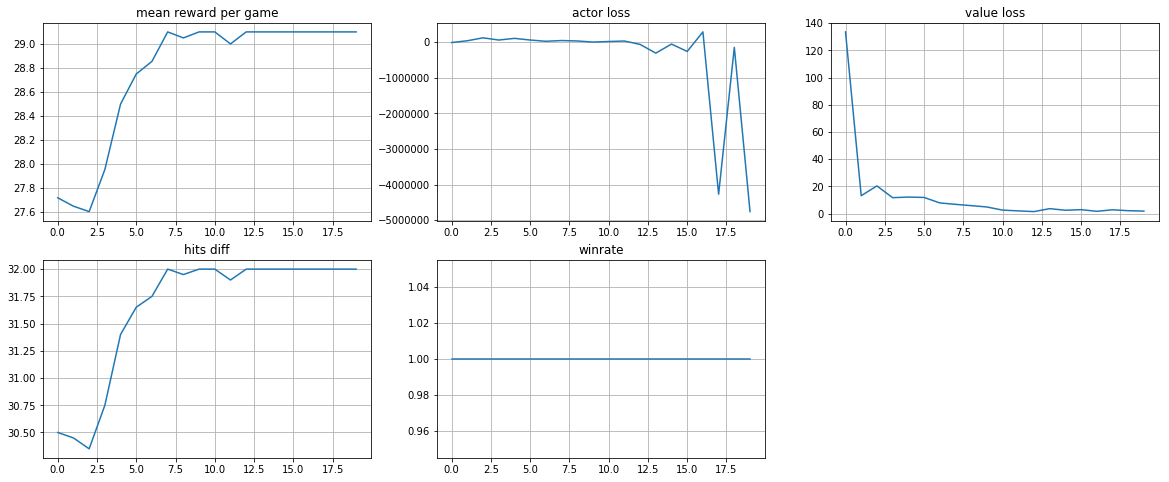

  0%|▏                                                                         | 1032/400000 [01:00<6:31:05, 17.00it/s]

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

  0%|▏                                                                         | 1032/400000 [01:20<6:31:05, 17.00it/s]

In [23]:
np.random.seed(0)

state = session.reset()
batch_loss_actor = []
batch_loss_value = []
for i in trange(4 * 10**5):
    
    
    states, actions, rewards, final_r, _ =  play_and_record(actor_network, session, n_steps=30, home_turn=home_turn)
    
    actions_var = Variable(torch.Tensor(actions).view(-1, n_actions))
    states_var = Variable(torch.Tensor(states).view(-1, state_dim))

    # train actor network
    actor_network_optim.zero_grad()
    log_softmax_actions = actor_network(states_var)
    vs = value_network(states_var).detach()
    
    # calculate qs
    qs = Variable(torch.Tensor(discount_reward(rewards, discount, final_r)))

    advantages = qs - vs
    actor_network_loss = -torch.mean(torch.sum(log_softmax_actions * actions_var, 1) * advantages)
    batch_loss_actor.append(actor_network_loss.detach().numpy())
    actor_network_loss.backward()
    torch.nn.utils.clip_grad_norm(actor_network.parameters(), 0.5)
    actor_network_optim.step()

    # train value network
    value_network_optim.zero_grad()
    target_values = qs
    values = value_network(states_var)
    criterion = nn.MSELoss()
    value_network_loss = criterion(values, target_values)
    batch_loss_value.append(value_network_loss.detach().numpy())
    value_network_loss.backward()
    torch.nn.utils.clip_grad_norm(value_network.parameters(), 0.5)
    value_network_optim.step()
    
    actor_network.epsilon *= 0.99

    # Testing
    if (i + 1) % 50== 0:
            session.reset()
            rewards_eval = []
            hits_diff = []
            wins = []
            enemy_core_hits = []
            
            eval_games = 20
            
            for i in range(eval_games):
                _, _, rewards_log, _, final_state = play_and_record(actor_network, session, n_steps=1000, home_turn=0)
                
                table = final_state["battleGround"]["table"]
                hits_d = table[home_turn][0][2] - table[1 - home_turn][0][2]
                
                enemy_core_hits.append(table[1 - home_turn][0][2])
                rewards_eval.append(np.sum(rewards_log))
                hits_diff.append(hits_d)
                wins.append(final_state["winner"])
            
            mean_enemy_core_hits.append(np.mean(enemy_core_hits))
            mean_hits_diff.append(np.mean(hits_diff))
           
            mean_win.append(np.count_nonzero(np.array(wins) == (1 - home_turn)) / eval_games)
                
            mean_rewards.append(np.mean(rewards_eval))
            mean_loss_actor.append(np.mean(batch_loss_actor))
            mean_loss_value.append(np.mean(batch_loss_value))
            
            batch_loss_actor = []
            batch_loss_value = []
            
            clear_output(True)
            
            plt.figure(figsize=[20, 8])    
            plt.subplot(2, 3, 1)
            plt.title("mean reward per game")
            plt.plot(range(len(mean_rewards)), mean_rewards)
            plt.grid()
            
            plt.subplot(2, 3, 2)
            plt.title("actor loss")
            plt.plot(range(len(mean_loss_actor)), mean_loss_actor)
            plt.grid()
            
            plt.subplot(2, 3, 3)
            plt.title("value loss")
            plt.plot(range(len(mean_loss_value)), mean_loss_value)
            plt.grid()
            
            plt.subplot(2, 3, 4)
            plt.title("hits diff")
            plt.plot(range(len(mean_hits_diff)), mean_hits_diff)
            #plt.plot(range(len(mean_enemy_core_hits)), mean_enemy_core_hits)
            plt.grid()
            
            plt.subplot(2, 3, 5)
            plt.title("winrate")
            plt.plot(range(len(mean_win)), mean_win)
            plt.grid()
            plt.show()

            plt.savefig("train.png");
    